## Homework 3

* Generate dataset using `make_blobs` function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Generating Dataset

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=2000, n_features=3, random_state=0)
X[:5], y[:5]

(array([[ 0.37819659, -0.82265364,  4.41250488],
        [ 0.11290836,  8.0727675 ,  9.91499801],
        [ 1.87598643, -2.86233678,  1.95530677],
        [-1.21059442,  6.87679811,  9.22330586],
        [ 2.09572999,  3.33520772,  3.28849625]]),
 array([1, 2, 1, 2, 0]))

### Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
data = pd.DataFrame(X)

In [6]:
data.describe()

,0,1,2
count,2000.000000,2000.000000,2000.000000
mean,0.240772,3.493821,4.739933
std,1.420266,4.002951,3.407143
min,-4.365209,-5.351844,-1.459501
25%,-0.758331,-0.964595,2.115543
50%,0.381250,4.278380,3.208216
75%,1.244579,7.137660,8.649354
max,4.077801,11.046691,12.079492


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB


In [8]:
data.isna().sum().sum()

0

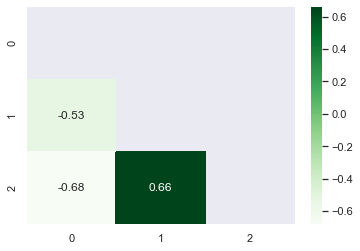

In [9]:
corr = data.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap='Greens', mask=mask, annot=True);

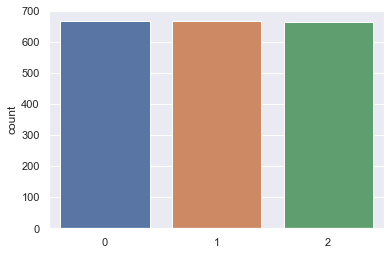

In [10]:
sns.countplot(x=y);

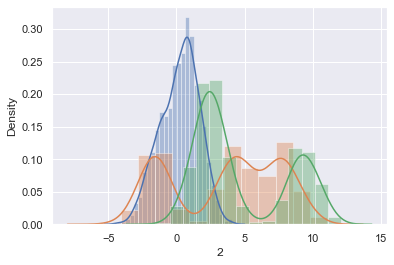

In [11]:
sns.distplot(data[0])
sns.distplot(data[1])
sns.distplot(data[2]);

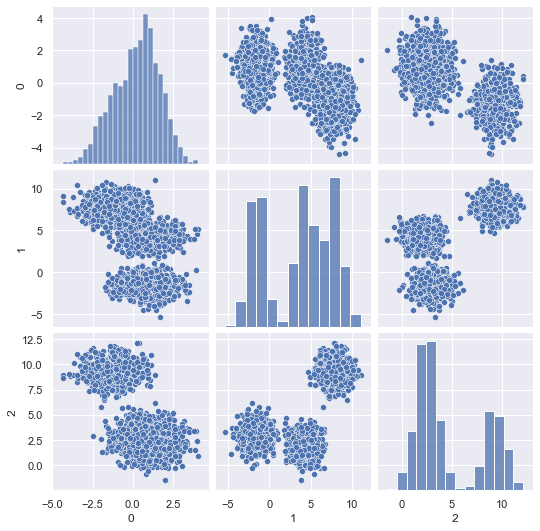

In [12]:
sns.pairplot(data);

### Preprocessing

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Modeling

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [16]:
params = {
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(4, 11, 2),
    'min_samples_leaf': np.arange(2, 11)
}

DT_model = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=params, cv=5, n_jobs=-1)
DT_model.fit(X_train, y_train);

In [17]:
DT_model.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [18]:
params = {
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11, 2),
    'learning_rate': np.logspace(-4, 1, 5),
    'subsample': np.linspace(0, 1, 10),
    'n_estimators': [10, 50, 100, 300, 500, 1000]
}

GB_model = RandomizedSearchCV(GradientBoostingClassifier(random_state=0),
                               param_distributions=params, n_iter=50, cv=5, n_jobs=-1, verbose=1)
GB_model.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.6min finished


In [19]:
GB_model.best_params_

{'subsample': 0.1111111111111111,
 'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 9,
 'max_depth': 3,
 'learning_rate': 0.0017782794100389228}

### Evaluation

In [20]:
from sklearn.metrics import confusion_matrix

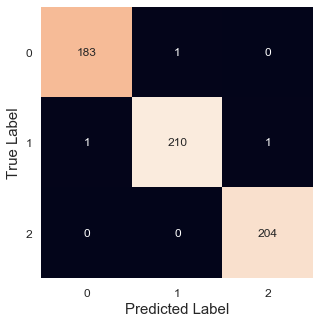

In [21]:
plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, DT_model.predict(X_test))
ax = sns.heatmap(cm, square=True, fmt='d', annot=True, cbar=False)
ax.xaxis.set_ticklabels(np.unique(y), fontsize=12)
ax.yaxis.set_ticklabels(np.unique(y), fontsize=12, rotation=0)
ax.set_xlabel('Predicted Label', fontsize=15)
ax.set_ylabel('True Label', fontsize=15)
plt.show()

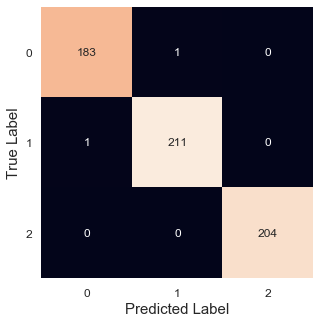

In [22]:
plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, GB_model.predict(X_test))
ax = sns.heatmap(cm, square=True, fmt='d', annot=True, cbar=False)
ax.xaxis.set_ticklabels(np.unique(y), fontsize=12)
ax.yaxis.set_ticklabels(np.unique(y), fontsize=12, rotation=0)
ax.set_xlabel('Predicted Label', fontsize=15)
ax.set_ylabel('True Label', fontsize=15)
plt.show()

In [23]:
pd.DataFrame({
    'Train Accuracy': [
        DT_model.score(X_train, y_train),
        GB_model.score(X_train, y_train)
    ],
    'Test Accuracy': [
        DT_model.score(X_test, y_test),
        GB_model.score(X_test, y_test)
    ],
    'Train Bias': [
        1 - DT_model.score(X_train, y_train),
        1 - GB_model.score(X_train, y_train)
    ],
    'Test Bias': [
        1 - DT_model.score(X_test, y_test),
        1 - GB_model.score(X_test, y_test)
    ],
    'Variance': [
        DT_model.score(X_train, y_train) - DT_model.score(X_test, y_test),
        GB_model.score(X_train, y_train) - GB_model.score(X_test, y_test)
    ]
}, index=['DT', 'GB'])

,Train Accuracy,Test Accuracy,Train Bias,Test Bias,Variance
DT,1.0,0.995000,0.0,0.005000,0.005000
GB,1.0,0.996667,0.0,0.003333,0.003333


Decision Tree and Gradient Boosting perform very well, as it is shown in the configuration matrix that Gradient Boosting performs slightly better by having 1 more precise classification than Decision Tree. There are **no underfitting or overfitting problems** here, as the bias and variance are very low. I would choose **Gradient Boosting** because it has better performance.